In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import tensorflow_hub as hub

from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.activations import swish


# Transfer Learning with InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))


Num GPUs Available:  1


In [116]:
data_dir = "/Users/narendrafuloria/Downloads/Indian_Dataset/"
train_path = "/Users/narendrafuloria/Downloads/Indian_Dataset/Final_Training/Images"
test_path = "/Users/narendrafuloria/Downloads/Indian_Dataset/Final_Test/Images"
height = 100
width = 100

In [117]:
classes = { 0:'Give way',
            1:'No entry',
            2:'One-way traffic',
            3:'One-way traffic',
            4:'No vehcils in both directions',
            5:'NO ENTRY FOR CYCLES',
            6:'NO ENTRY FOR GOODS VEHCILS',
            7:'NO ENTRY FOR PEDESTRIANS',
            8:'NO ENTRY FOR BULLOCK CARTS',
            9:'NO ENTRY FOR HAND CARTS',
            10:'NO ENTRY FOR MOTOR VEHCILS',
            11:'HEIGHT LIMIT',
            12:'WEIGHT LIMIT',
            13:'AXLE WEIGHT LIMIT',
            14:'LENGTH LIMIT',
            15:'NO LEFT TURN',
            16:'NO RIGHT TURN',
            17:'NO OVERTAKING',
            18:'MAXIMUM SPEED LIMIT 90KM/HR',
            19:'MAXIMUM SPEED LIMIT 110 KM/HR',
            20:'HORN PROHIBITED',
            21:'NO PARKING',
            22:'NO STOPPING',
            23:'TURN LEFT',
            24:'TURN RIGHT',
            25:'STEEP DESCENT',
            26:'STEEP ASCENT',
            27:'NARROW ROAD',
            28: 'NARROW BRIDGE',
            29:'UNPROTECTED QUAY',
            30:'ROAD HUMP',
            31:'DIP',
            32:'LOOSE GRAVEL',
            33:'FALLING ROCKS',
            34:'CATTLE',
            35:'CROSSROADS',
            36:'SIDE ROAD JUNCTION',
            37:'SIDE ROAD JUNCTION',
            38:'OBLIQUE SIDE ROAD JUNCTION',
            40:'T- JUNCTION',
            41:'Y-JUNCTION',
            42:'STAGGERD SIDE ROAD JUNCTION',
            43:'STAGGERD SIDE ROAD JUNCTION',
            44: 'ROUNDABOUT',
            45: 'GUARDED LEVEL CROSSING AHEAD',
            46: 'UNGUARDED LEVEL CROSSING AHEAD',
            47: 'LEVEL CROSSING COUNTDOWN MARKER',
            48: 'LEVEL CROSSING COUNTDOWN MARKER',
            49: 'LEVEL CROSSING COUNTDOWN MARKER',
            50: 'LEVEL CROSSING COUNTDOWN MARKER',
            51: 'PARKING',
            52: 'BUS STOP',
            53: 'FIRST AID POST',
            54: 'TELEPHONE',
            55: 'FILLING STATION',
            56: 'HOTEL',
            57: 'RESTAURANT',
            58: 'REFRESHMENTS'}
            

In [118]:
batch_size = 150
seed = 42

In [119]:
train_datagen = ImageDataGenerator(rescale=1./255,          
    validation_split=0.1)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.1)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 11816 images belonging to 58 classes.
Found 1274 images belonging to 58 classes.


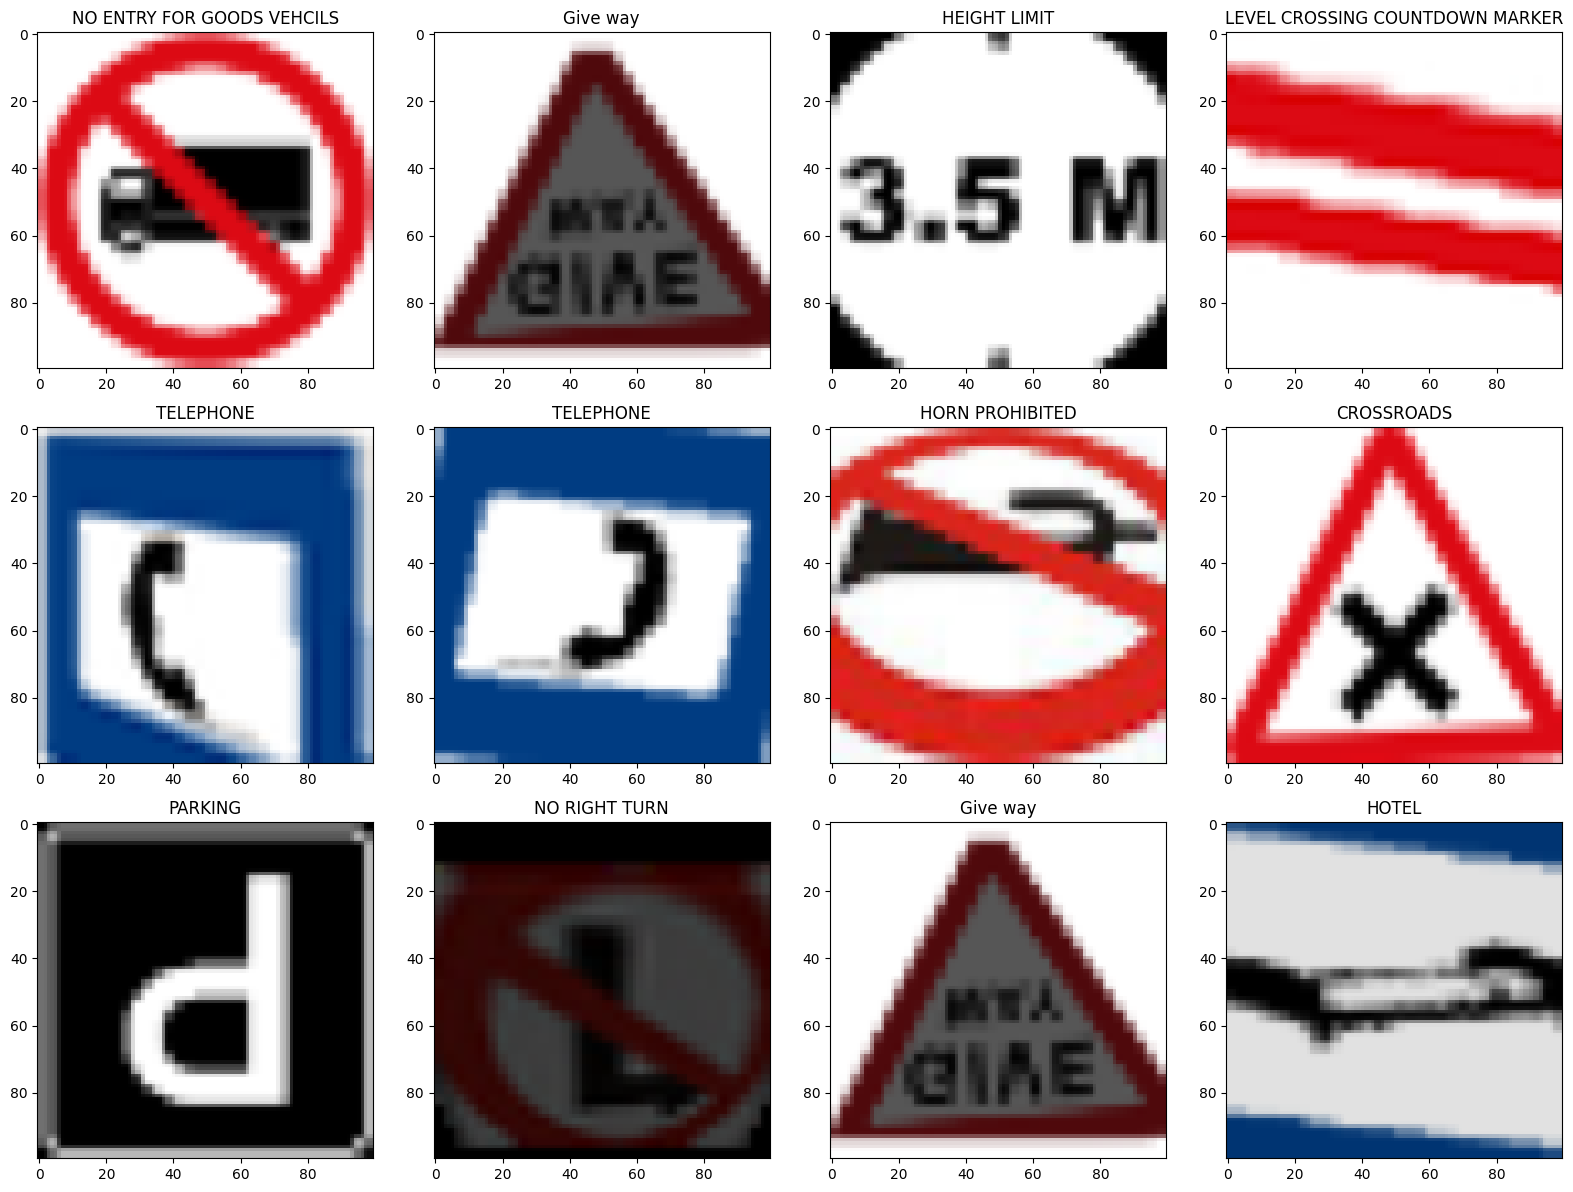

In [120]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [121]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    # keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # keras.layers.MaxPool2D(pool_size=(2, 2)),
    # keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Dropout(rate=0.4),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),

    keras.layers.Dense(58, activation='softmax')
])

In [122]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 conv2d_95 (Conv2D)          (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_61 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_96 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_97 (Conv2D)          (None, 44, 44, 64)      

In [123]:
alpha=0.001
epochs=20
optim = keras.optimizers.legacy.Adam(learning_rate= alpha)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.1,          # Factor by which the learning rate will be reduced
    patience=3,        # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-2,      # Minimum change to qualify as an improvement
    cooldown=0,          # Number of epochs to wait before resuming normal operation after lr has been reduced
    min_lr=1e-6          # Lower bound on the learning rate
)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [124]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset),callbacks = [reduce_lr])

Epoch 1/20
79/79 [==============================] - 69s 854ms/step - loss: 2.9913 - accuracy: 0.2767 - val_loss: 5.5742 - val_accuracy: 0.0196 - lr: 0.0010
Epoch 2/20
79/79 [==============================] - 62s 781ms/step - loss: 1.3623 - accuracy: 0.6043 - val_loss: 9.0984 - val_accuracy: 0.0126 - lr: 0.0010
Epoch 3/20
79/79 [==============================] - 70s 882ms/step - loss: 0.8943 - accuracy: 0.7329 - val_loss: 7.7854 - val_accuracy: 0.0392 - lr: 0.0010
Epoch 4/20
79/79 [==============================] - 70s 889ms/step - loss: 0.6620 - accuracy: 0.8000 - val_loss: 6.9746 - val_accuracy: 0.0424 - lr: 0.0010
Epoch 5/20
79/79 [==============================] - 62s 788ms/step - loss: 0.5062 - accuracy: 0.8438 - val_loss: 4.3413 - val_accuracy: 0.1421 - lr: 1.0000e-04
Epoch 6/20
79/79 [==============================] - 65s 819ms/step - loss: 0.4687 - accuracy: 0.8510 - val_loss: 2.0923 - val_accuracy: 0.4089 - lr: 1.0000e-04
Epoch 7/20
79/79 [==============================] - 61s 

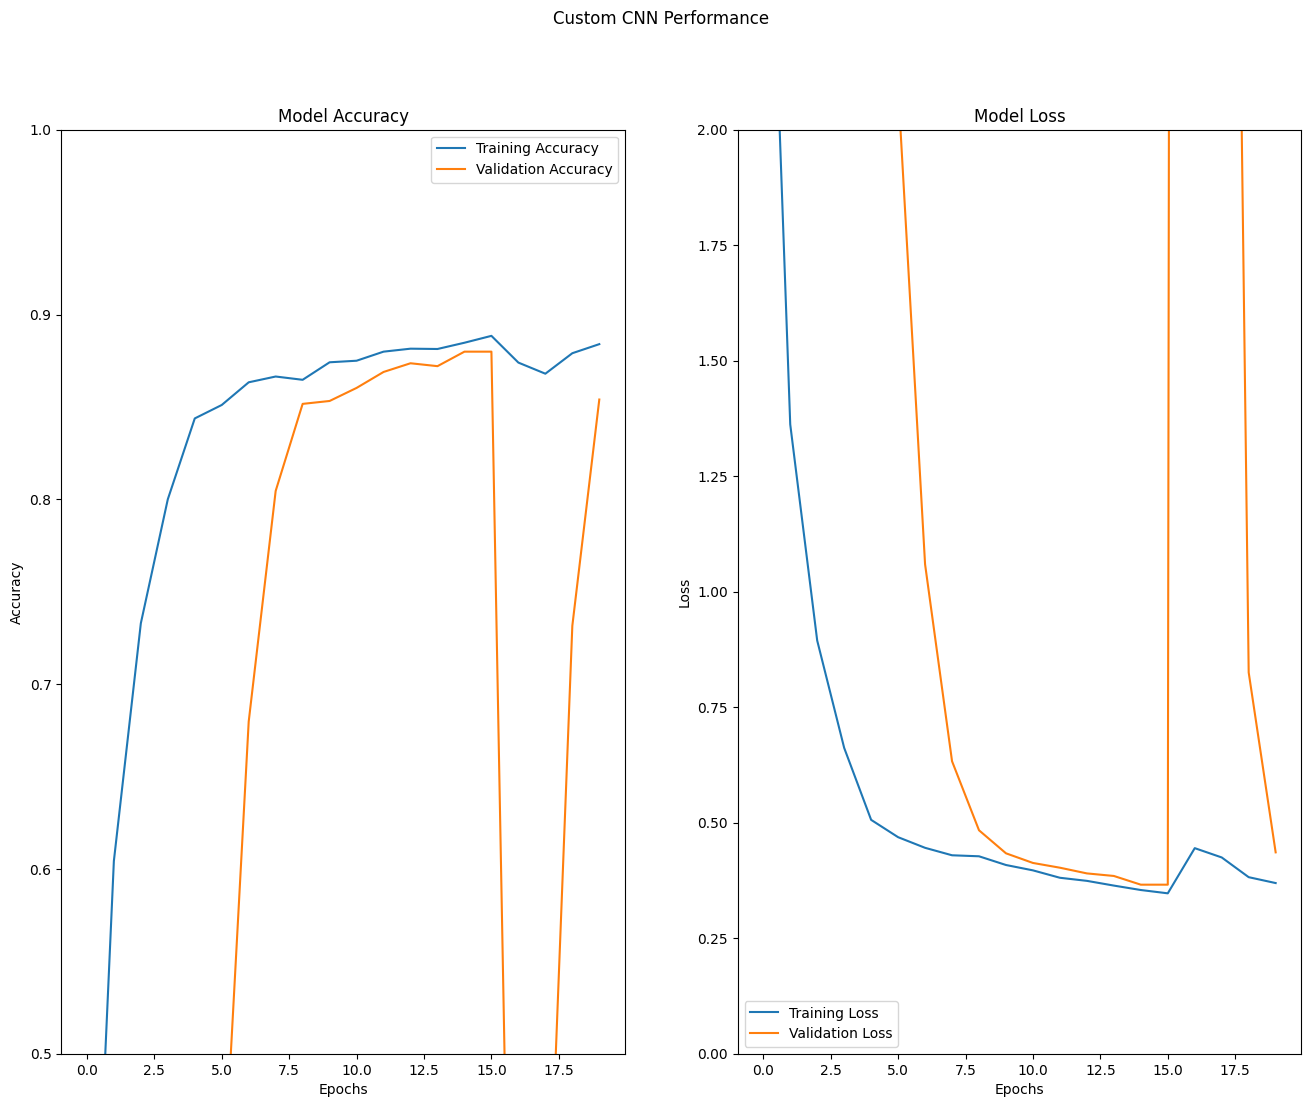

<Figure size 1000x700 with 0 Axes>

In [125]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,2)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [126]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
# test_df = pd.read_csv('/Users/narendrafuloria/content/GTSRB/Final_Test/Images/GT-final_test.csv',delimiter=';')

destination_folder = "/Users/narendrafuloria/Downloads/Indian_Dataset/Final_Test/Images/"

test_labels = np.array([])
imgs = np.array([])
for filename in os.listdir(destination_folder):
    i = np.array(int(filename[0:2]))
    test_labels = np.append(test_labels , i)
    imgs = np.append(imgs,filename)
# print(imgs)


data =[]

for img in imgs:
    try:
        image = cv2.imread(destination_folder +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255
len(X_test)

820

In [127]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(len(pred))
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

26/26 [==============================] - 2s 50ms/step
820
Test Data accuracy:  46.707317073170735


5/5 [==============================] - 0s 112ms/step


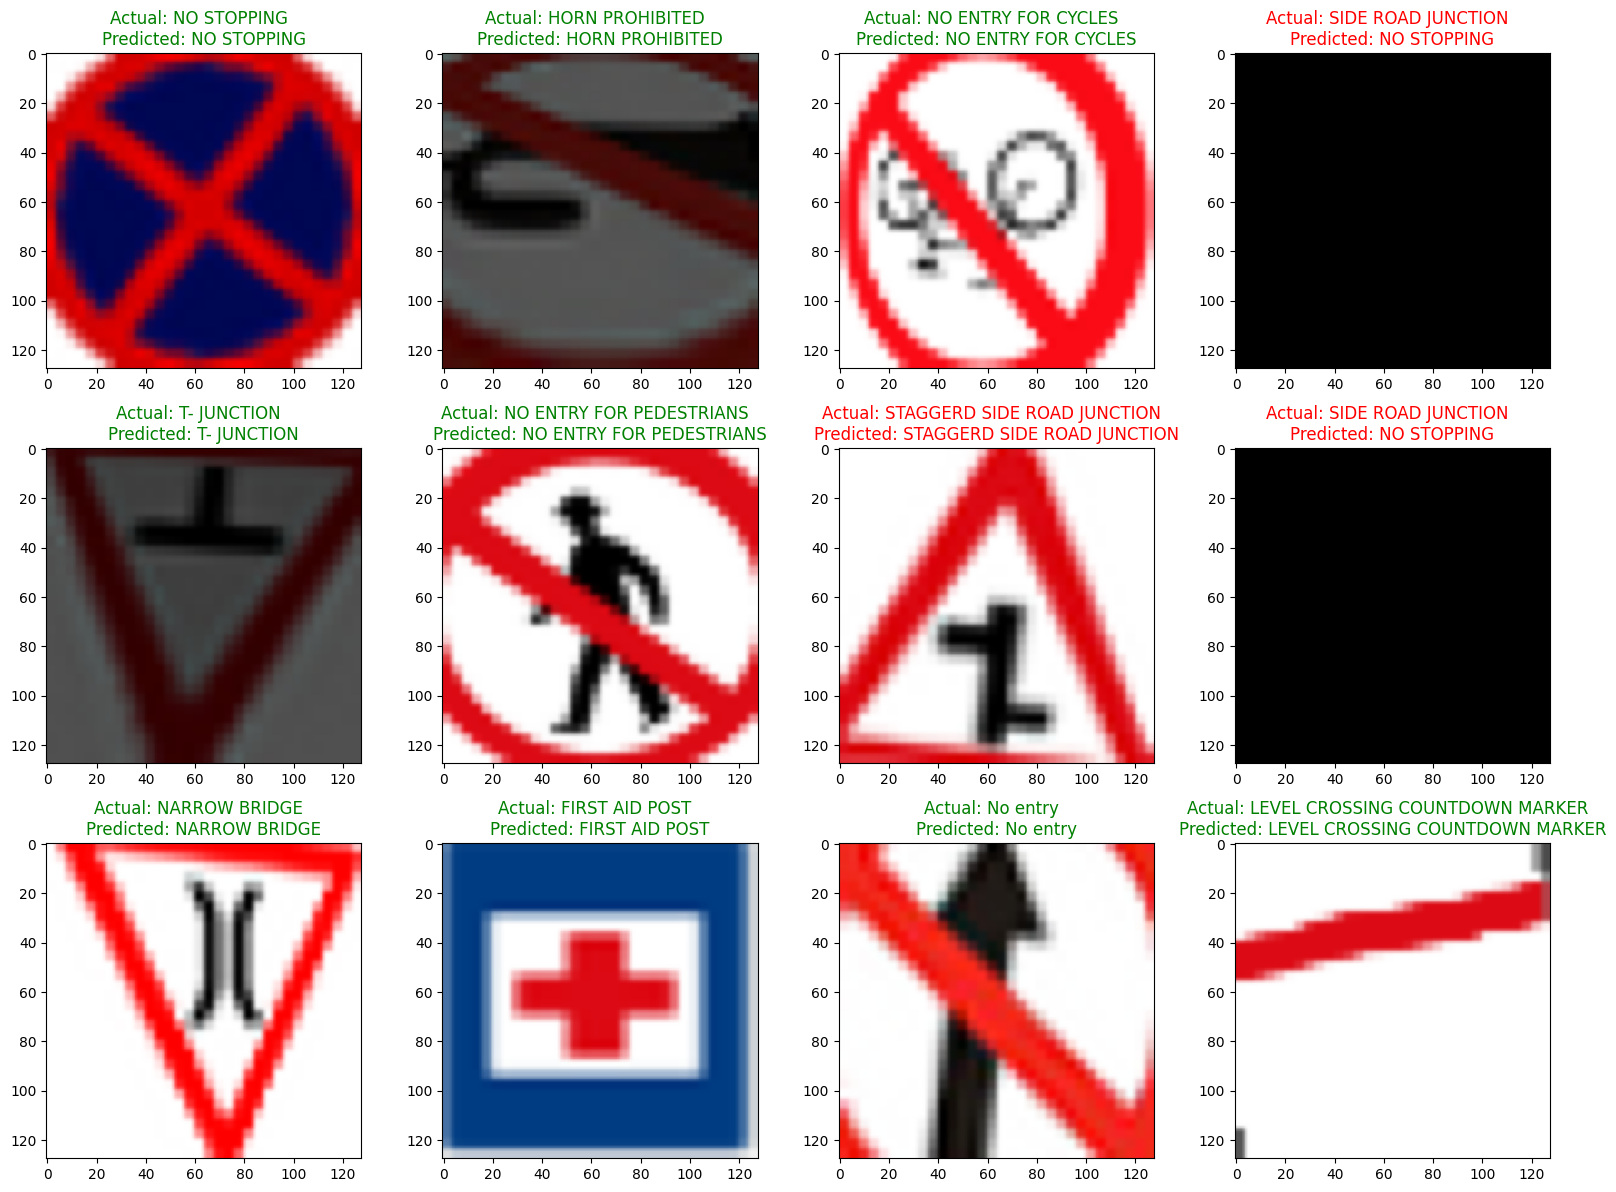

In [107]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()